In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from pathlib import Path
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [21]:
ch4_results = pd.read_csv("./intermediate_datafiles/chapter4_result.csv")

In [25]:
print([c for c in ch4_results.columns if "mad" in c])
# print(ch4_results["acc_phone_z_freq_energy"])
# print(ch4_results["acc_phone_sma"])
# print(ch4_results["acc_phone_z_temp_mad_ws_120"])
# print(ch4_results["light_phone_lux_temp_sum_ws_120"])

['acc_phone_x_temp_mad_ws_120', 'acc_phone_y_temp_mad_ws_120', 'acc_phone_z_temp_mad_ws_120', 'acc_watch_x_temp_mad_ws_120', 'acc_watch_y_temp_mad_ws_120', 'acc_watch_z_temp_mad_ws_120', 'gyr_phone_x_temp_mad_ws_120', 'gyr_phone_y_temp_mad_ws_120', 'gyr_phone_z_temp_mad_ws_120', 'gyr_watch_x_temp_mad_ws_120', 'gyr_watch_y_temp_mad_ws_120', 'gyr_watch_z_temp_mad_ws_120', 'hr_watch_rate_temp_mad_ws_120', 'light_phone_lux_temp_mad_ws_120', 'mag_phone_x_temp_mad_ws_120', 'mag_phone_y_temp_mad_ws_120', 'mag_phone_z_temp_mad_ws_120', 'mag_watch_x_temp_mad_ws_120', 'mag_watch_y_temp_mad_ws_120', 'mag_watch_z_temp_mad_ws_120', 'press_phone_pressure_temp_mad_ws_120', 'pca_1_temp_mad_ws_120', 'pca_2_temp_mad_ws_120', 'pca_3_temp_mad_ws_120', 'pca_4_temp_mad_ws_120', 'pca_5_temp_mad_ws_120', 'pca_6_temp_mad_ws_120', 'pca_7_temp_mad_ws_120']


In [30]:
new_features = ["acc_phone_z_freq_energy", "acc_phone_sma", "acc_phone_z_temp_mad_ws_120", "light_phone_lux_temp_sum_ws_120"]
assert all([c in ch4_results.columns for c in new_features])
# [c for c in ch4_results.columns if "sum" in c]

In [31]:
ch4_results

,Unnamed: 0,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,...,mag_watch_z_freq_1.2_Hz_ws_40,mag_watch_z_freq_1.3_Hz_ws_40,mag_watch_z_freq_1.4_Hz_ws_40,mag_watch_z_freq_1.5_Hz_ws_40,mag_watch_z_freq_1.6_Hz_ws_40,mag_watch_z_freq_1.7_Hz_ws_40,mag_watch_z_freq_1.8_Hz_ws_40,mag_watch_z_freq_1.9_Hz_ws_40,mag_watch_z_freq_2.0_Hz_ws_40,mag_watch_sma
0,2016-02-08 18:28:25.656222395,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-08 18:28:28.406222395,-0.088630,0.170400,9.628089,9.551315,0.197073,1.505779,-0.008870,0.018457,-0.000912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-08 18:28:31.156222395,-0.084584,0.171914,9.620668,9.552778,0.194151,1.509347,-0.008438,0.018855,0.000159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-08 18:28:33.906222395,-0.081381,0.170345,9.634230,9.546574,0.200030,1.507089,-0.008650,0.018903,-0.003626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-08 18:28:36.656222395,-0.097313,0.136100,9.623921,9.545983,0.197746,1.516108,-0.011363,0.015230,-0.023521,...,-1.187140,1.130804,-0.404600,1.012557,1.166098,0.513057,0.379136,0.327439,0.307611,1235.162470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2016-02-08 18:32:22.156222395,-0.194361,0.181047,9.616830,9.551588,0.198582,1.505467,-0.008800,0.019329,0.000786,...,1.064711,-2.812354,0.503196,-0.865103,0.390566,0.104591,0.065310,0.051799,0.047031,1240.818012
87,2016-02-08 18:32:24.906222395,-0.193918,0.184009,9.628774,9.552019,0.197606,1.516128,-0.008862,0.019618,0.000578,...,1.687453,2.098518,1.472662,-0.645324,0.110790,0.070327,0.083393,0.091746,0.095462,1243.673668
88,2016-02-08 18:32:27.656222395,-0.193748,0.180511,9.621484,9.549264,0.196053,1.514445,-0.008797,0.019172,0.000632,...,-0.922284,0.081582,1.110353,0.080145,-0.383606,-0.147192,-0.111275,-0.099503,-0.095408,1242.198111
89,2016-02-08 18:32:30.406222395,-0.198219,0.178109,9.614591,9.547516,0.197236,1.518097,-0.008814,0.019341,0.000741,...,0.382282,0.187465,0.198455,1.456734,0.185699,0.333014,0.314655,0.299049,0.291271,1244.436428


In [28]:
from util.VisualizeDataset import VisualizeDataset
DataViz = VisualizeDataset(os.path.abspath(''))

/Users/roman/dev/ML4QS/Python3Code/util/VisualizeDataset.py:124: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  xar[i].set_ylim(


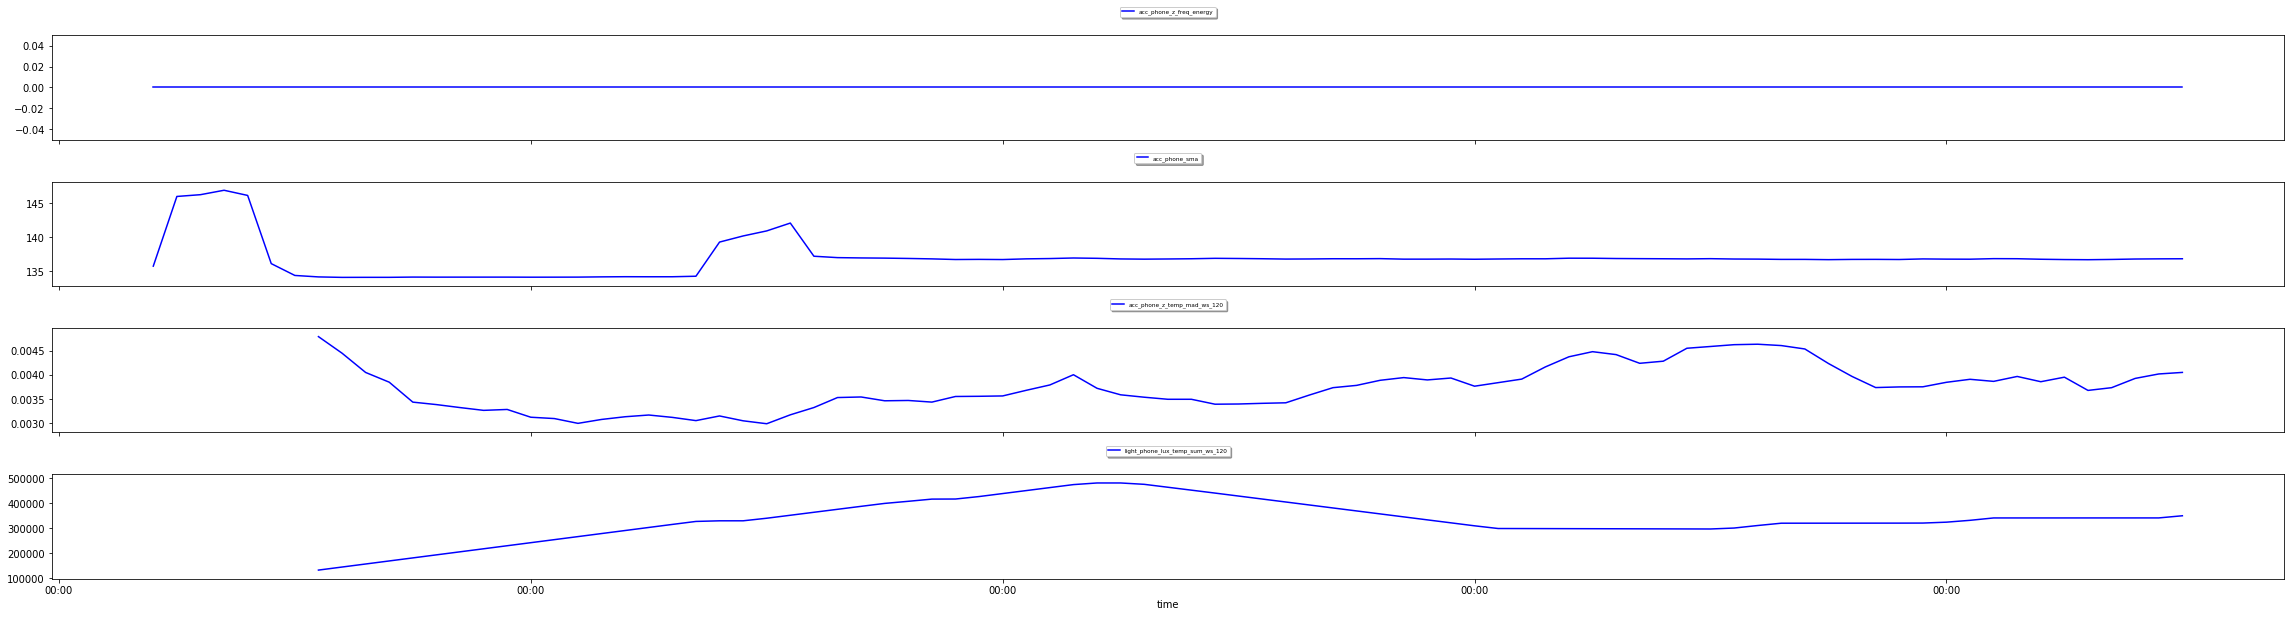

In [32]:
DataViz.plot_dataset(
    ch4_results, new_features,
    ["like"] * len(new_features),
    ["line"] * len(new_features),
    save=False, figsize=(40,10))